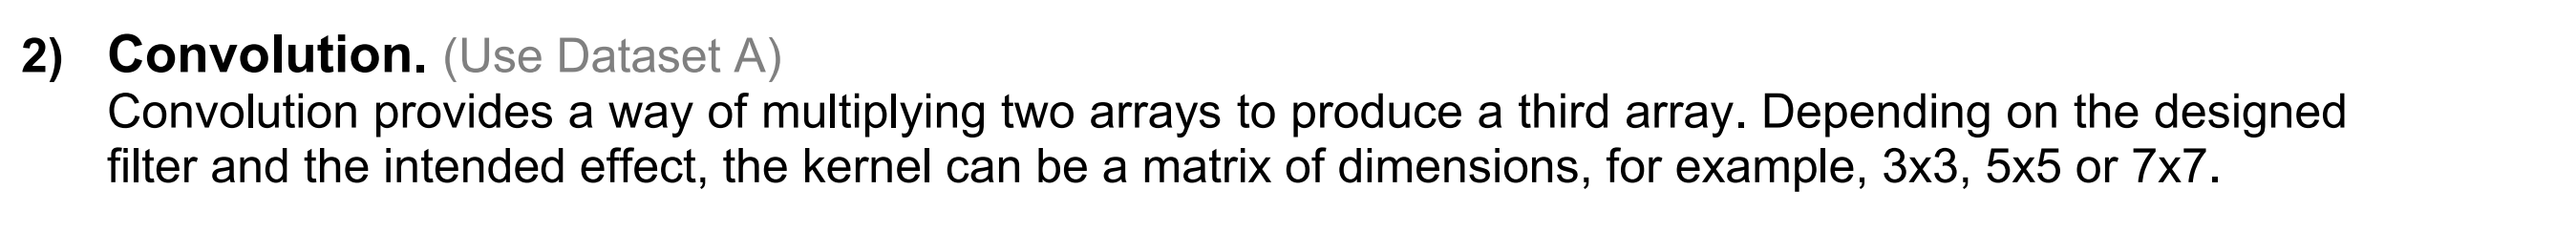

In [38]:
# import required packages (Image and PIL are ONLY used to read and write images)
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

In [39]:
# define a path for the input image
path = "Dataset//DatasetA//car-1.jpg"
# create an np array from the input image
image = np.array(Image.open(path))

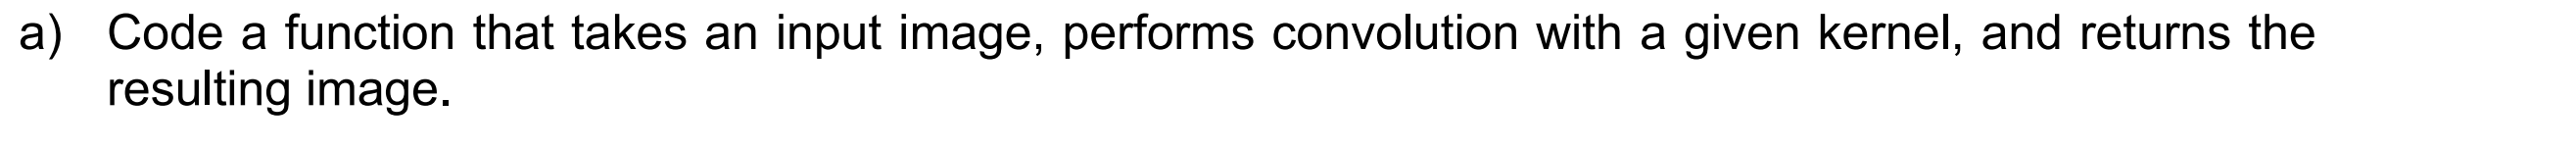

In [40]:
# returns an output array which is the convolution of the given kernel on the input image
# to handle the border problem in this function we use zero padding approach
def convolution (image, kernel):
    
    step = math.floor(kernel.shape[0]/2)
    reshape_factor = step * 2
    kernel_height, kernel_width = kernel.shape[0],kernel.shape[1]
    
    # to handle the border problem we define new grid for image which is bigger and padded by zero 
    # the new grid height and width is calculated by adding kernel size to the old width and height
    new_image = np.zeros((image.shape[0] + reshape_factor, image.shape[1] + reshape_factor, image.shape[2]))
    # we want to copy values of the old grid in the center of the new grid so by applying kernel on the pixels
    # which are on the border or in the kernel_size/2 or less from the border, zero padding help us to calculate the convolution
    # so we copy our image in the new grid which has the the kernel_size/2 distance from each border of the new grid to
    # participate all the pixels in the convolution operation
    new_image[step:new_image.shape[0]-step, step:new_image.shape[1]-step,:] = image
    # we create an output grid which has the same shape as input image since convolution does not change the size of the image
    output = np.zeros((image.shape))
    
    # we iterate through our output array
    
    for k in range(output.shape[2]):
        for i in range(output.shape[0]):
            # We calculate the interval of the height of the image that should participate in the convolution operation
            i_start, i_stop = i, i+kernel_height
            for j in range(output.shape[1]):
                # We calculate the interval of the width of the image that should participate in the convolution operation
                j_start, j_stop = j, j+kernel_width
                # if we are not in the border of the padded grid
                if i_start >= 0 and j_start>=0 and i_stop < new_image.shape[0] and j_stop < new_image.shape[1]:
                    # perform element-wise multipication of the specified interval of image and kernel 
                    multipication = np.multiply(new_image[i_start:i_stop, j_start:j_stop, k], kernel) 
                    # sum all of the elements
                    multipication = np.sum(multipication)
                    # if multipication is negative change it is zero
                    multipication = 0 if multipication<0 else multipication
                    # if sum of the kernel value is 0 do not perform division
                    if np.sum(kernel) > 0:
                        # else divide the sum of products by sum of the values in the kernel
                         output[i, j, k] = multipication / np.sum(kernel)
                    else:
                        output[i, j, k] = multipication
    
    print("Convolution finished!")
    return output

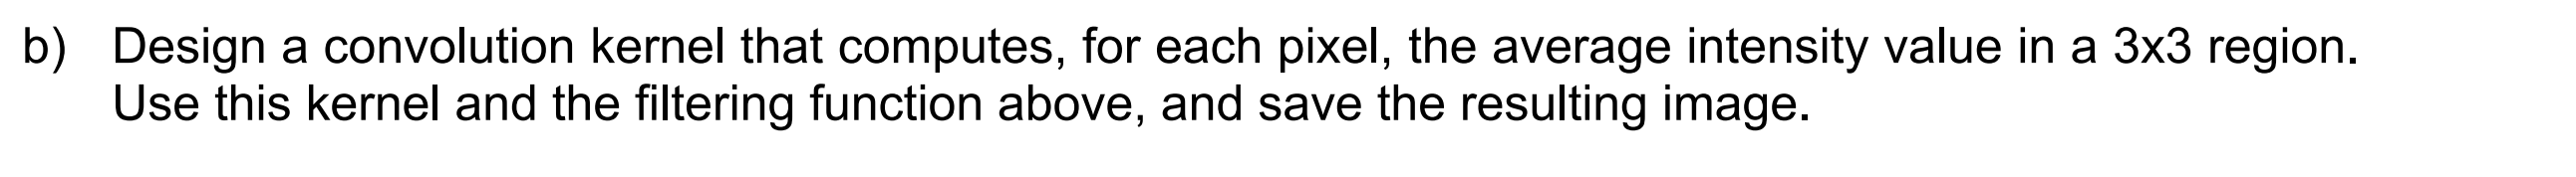

In [41]:
# the answer of the question is the first item of average kernels array below
avg_kernels = [np.ones((3, 3)), np.ones((5, 5)), np.ones((7, 7)), np.ones((13, 13))]

Convolution finished!


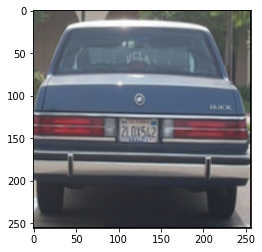

In [42]:
out = Image.fromarray((convolution(image, avg_kernels[0])).astype(np.uint8))
plt.imshow(out)
out.save("convs/"+"Q2-b/"+"avg_intensity.png")

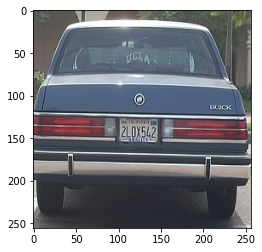

In [52]:
plt.imshow(image)

# Example

Convolution finished!
Convolution finished!
Convolution finished!
Convolution finished!


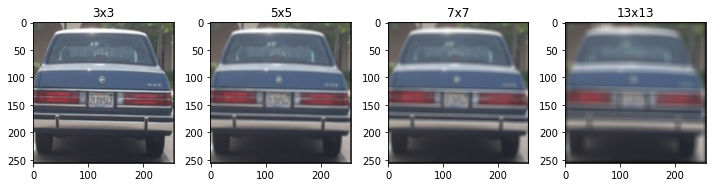

In [43]:
# convoultion with different average kernel sizes
outputs = []
titles = ["3x3", "5x5", "7x7", "13x13"]

for kernel in avg_kernels:
    outputs.append(Image.fromarray((convolution(image, kernel)).astype(np.uint8)))
    
fig, axes = plt.subplots(1, 4, figsize=(10, 10))

for j in range(4):


    axes[j].imshow(outputs[j])
    axes[j].set_title(titles[j])

plt.tight_layout()
plt.show()

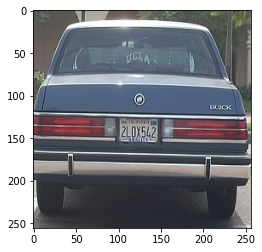

In [44]:
plt.imshow(image)

In [45]:
# saving the results
for i in range(len(outputs)):
    outputs[i].save("convs/"+"Examples/"+ "cars-1" + titles[i] + ".png")

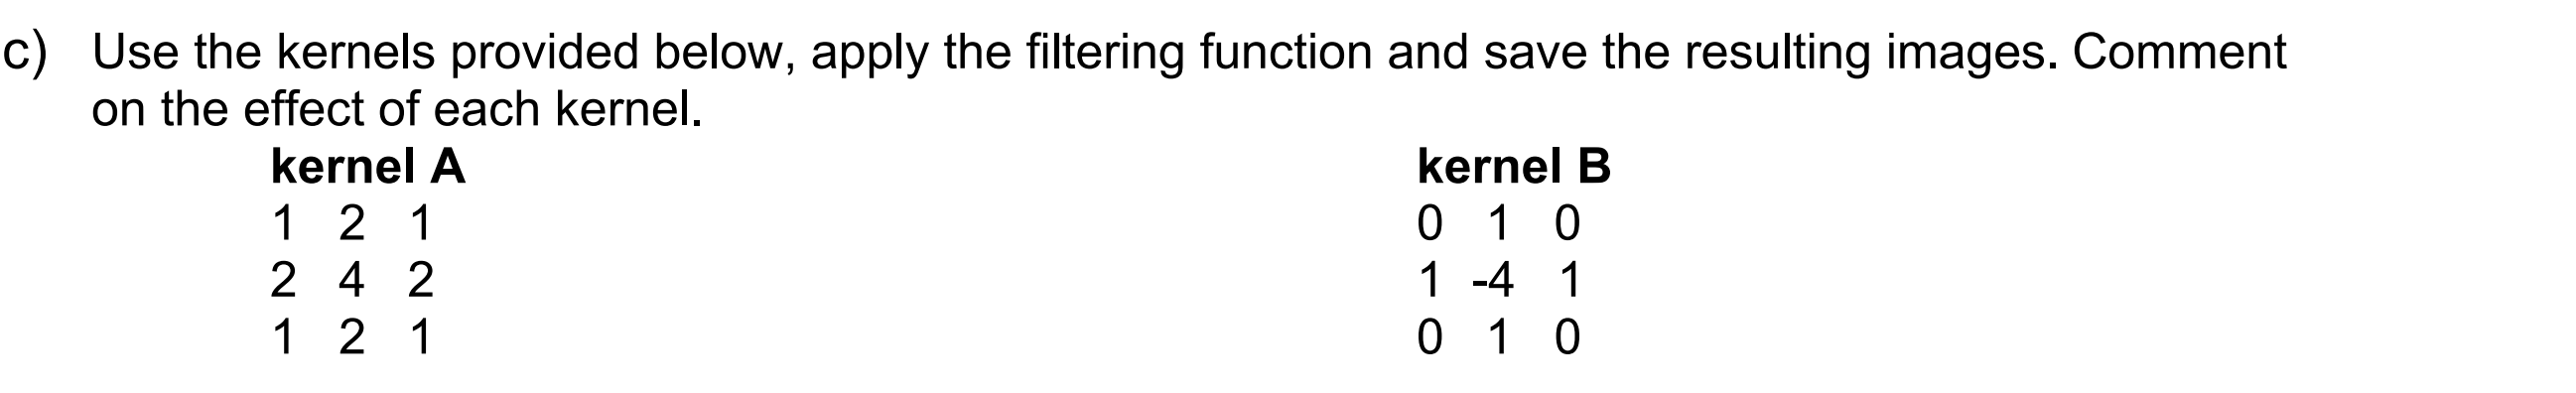

In [46]:
#creat np 2-D array for each kernel
kernel_A = np.array([[1,2,1],[2,4,2],[1,2,1]])
kernel_B = np.array([[0,1,0],[1,-4,1],[0,1,0]])

Convolution finished!


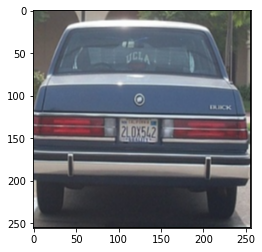

In [47]:
# apply kernelA and save the result
output_A = Image.fromarray((convolution(image, kernel_A)).astype(np.uint8))
plt.imshow(output_A)
output_A.save("convs/"+ "Q2-c/" + "kernel_A" + ".png")

Convolution finished!


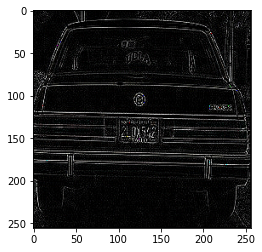

In [48]:
# apply kernelB and save the result
output_B = Image.fromarray((convolution(image, kernel_B)).astype(np.uint8))
plt.imshow(output_B)
output_A.save("convs/"+ "Q2-c/" + "kernel_B" + ".png")

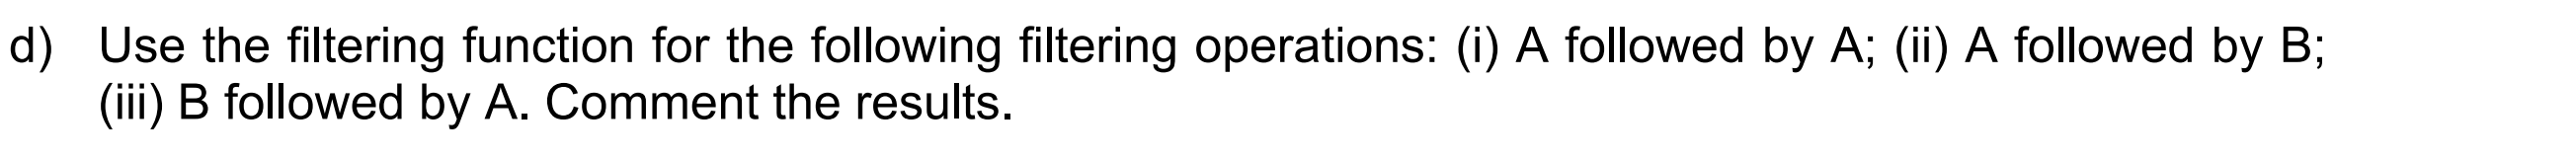

Convolution finished!
Convolution finished!


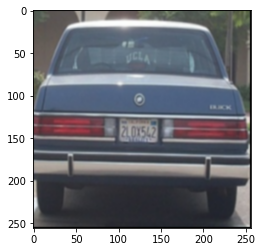

In [49]:
# apply kernelA followed by A 
output_AA = Image.fromarray((convolution(convolution(image, kernel_A), kernel_A)).astype(np.uint8))

plt.imshow(output_AA)

Convolution finished!
Convolution finished!


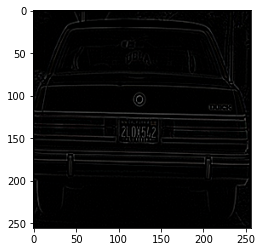

In [50]:
# apply kernelA followed by B
output_AB = Image.fromarray((convolution(convolution(image, kernel_A), kernel_B)).astype(np.uint8))

plt.imshow(output_AB)

Convolution finished!
Convolution finished!


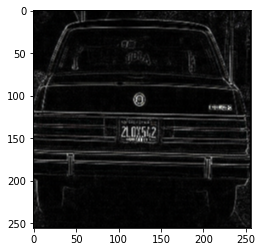

In [51]:
# apply kernelB followed by A 
output_BA = Image.fromarray((convolution(convolution(image, kernel_B), kernel_A)).astype(np.uint8))

plt.imshow(output_BA)